In [1]:
#Importng necessary libraries

import numpy 
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils

In [2]:
#load data

(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [5]:
#Understanding the data

x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

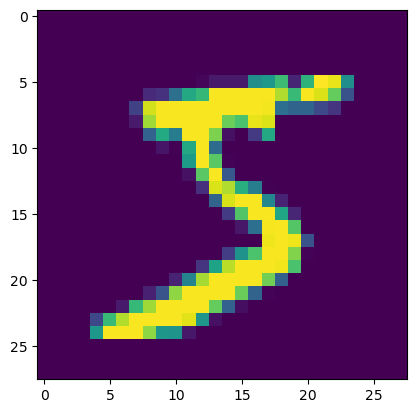

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [8]:
y_train.shape

(60000,)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
#Reshaping Dataset

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [11]:
#one hot coding

number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [12]:
y_train.shape

(60000, 10)

In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
# Creating the Model

model = Sequential()
model.add(Conv2D(64,(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes, activation='softmax'))


In [15]:
#Compiling the Model

model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

In [16]:
#Filling the model

model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=50)

Epoch 1/50
1875/1875 [==============================] - 85s 45ms/step - loss: 0.2234 - accuracy: 0.9498 - val_loss: 0.0871 - val_accuracy: 0.9717
Epoch 2/50
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0703 - accuracy: 0.9789 - val_loss: 0.0822 - val_accuracy: 0.9731
Epoch 3/50
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0483 - accuracy: 0.9848 - val_loss: 0.0861 - val_accuracy: 0.9784
Epoch 4/50
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0363 - accuracy: 0.9889 - val_loss: 0.1030 - val_accuracy: 0.9764
Epoch 5/50
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0284 - accuracy: 0.9913 - val_loss: 0.1074 - val_accuracy: 0.9762
Epoch 6/50
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0242 - accuracy: 0.9926 - val_loss: 0.1170 - val_accuracy: 0.9758
Epoch 7/50
1875/1875 [==============================] - 85s 46ms/step - loss: 0.0196 - accuracy: 0.9940 - val_loss: 0.1181 -

In [17]:
#Observing the metrics 

#final evaluation of the model

metrics = model.evaluate(x_test,y_test,verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[1.0656968355178833, 0.9819999933242798]


In [18]:
#Predicting the output

prediction=model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 193ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:
#Saving the model

#save the model
model.save('models/mnistCNN.h5')

In [20]:
#Taking images as input and checking results

#importing the keras libraries and packages

from tensorflow.keras.models import load_model
model = load_model(r'C:\Users\BANDARI SANDEEP\jupyterpython\models\mnistCNN.h5')

    

In [21]:
from PIL import Image
import numpy as np




In [24]:
img = Image.open('C:\projectinputimage.jpg').convert("L")  #convert image to monochrome


In [25]:
img = img.resize((28,28))  #resizing of input image


In [26]:
im2arr = np.array(img)   #converting to image
im2arr = im2arr.reshape(1,28,28,1)   #reshaping according to our requirement
    
#Predicting the Test set results
y_pred = model.predict(im2arr)   #predicting the results
print(y_pred)

1/1 [==============================] - 0s 47ms/step
[[0.09675271 0.15796441 0.09094648 0.082291   0.09104969 0.08750061
  0.09517261 0.10598388 0.09427892 0.09805963]]
